In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast


from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']= df['job_skills'].apply(lambda job_skills: ast.literal_eval(job_skills) if pd.notna(job_skills) else job_skills)

In [3]:
#create a single subplot

<function matplotlib.pyplot.show(close=None, block=None)>

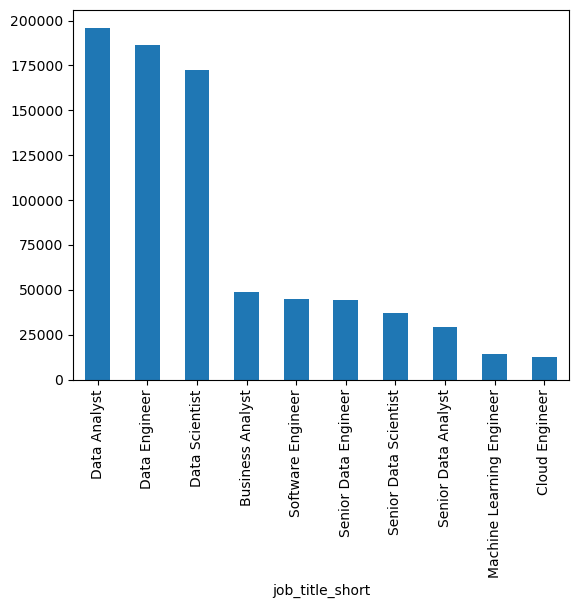

In [4]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind = 'bar', ax= ax)
plt.show

In [5]:
#Let's add two plots

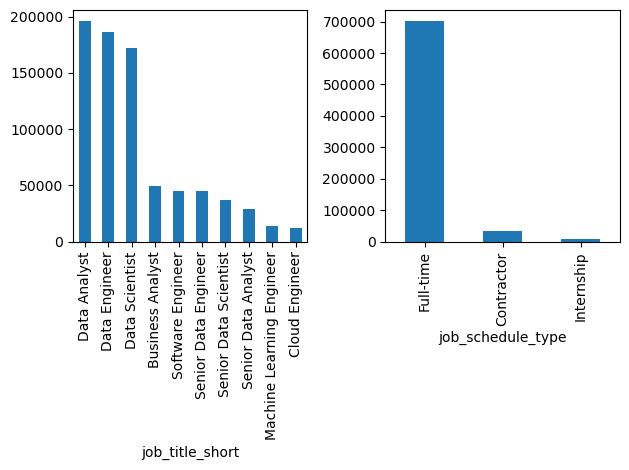

In [6]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind= 'bar', ax= ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind= 'bar', ax= ax[1])
fig.tight_layout()

In [7]:
#Examples : Create a subplot that displays individual bar charts for each job_title_short from the DataFrame we created in 11_Pandas_Explode.

In [8]:
df_exploded = df.explode('job_skills')

skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

df_skills_count = skills_count.reset_index(name= 'skill_count')

df_skills_count = df_skills_count.sort_values(by= 'skill_count', ascending= False)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [9]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

In [10]:
job_titles = job_titles[ : 3]

In [11]:
job_titles  

['Data Scientist', 'Data Engineer', 'Data Analyst']

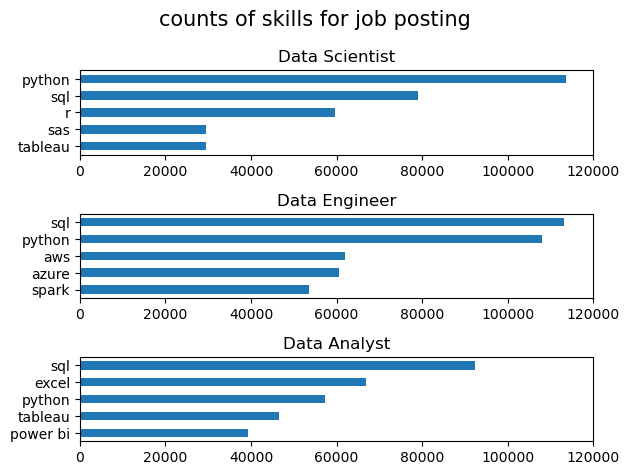

In [12]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']== job_title].head(5)
    df_plot.plot(kind = 'barh', x='job_skills', y='skill_count' , ax=ax[i], title= job_title )
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('counts of skills for job posting',fontsize= 15)
fig.tight_layout()    